## Javad Ranjbar Kermani
## 400209795
## Question 5 part b
## Dcision tree and optimizing hyper parameters

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('transfusion.data')
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [3]:
x = df.iloc[:, 0:-1] #features
y = df.iloc[:, -1] #labels

In [4]:
#split the dataset into train, valid and test
from sklearn.model_selection import train_test_split
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=0.1, random_state=42)

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV #for cross validation
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

In [6]:
# decision tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred_train = dt_model.predict(x_train)
y_pred_valid = dt_model.predict(x_valid)
y_pred_test = dt_model.predict(x_test)
print('accuracy_score :', '\n')
print(f'train : {accuracy_score(y_train, y_pred_train)}')
print(f'valid : {accuracy_score(y_valid, y_pred_valid)}')
print(f'test : {accuracy_score(y_test, y_pred_test)}', '\n')
print('precision_score :', '\n')
print(f'train : {precision_score(y_train, y_pred_train)}')
print(f'valid : {precision_score(y_valid, y_pred_valid)}')
print(f'test : {precision_score(y_test, y_pred_test)}', '\n')
print('f1_score :', '\n')
print(f'train : {f1_score(y_train, y_pred_train)}')
print(f'valid : {f1_score(y_valid, y_pred_valid)}')
print(f'test : {f1_score(y_test, y_pred_test)}', '\n')
print('recall_score :', '\n')
print(f'train : {recall_score(y_train, y_pred_train)}')
print(f'valid : {recall_score(y_valid, y_pred_valid)}')
print(f'test : {recall_score(y_test, y_pred_test)}', '\n')

accuracy_score : 

train : 0.9386617100371747
valid : 0.6833333333333333
test : 0.68 

precision_score : 

train : 0.989247311827957
valid : 0.42857142857142855
test : 0.2962962962962963 

f1_score : 

train : 0.8479262672811061
valid : 0.3870967741935484
test : 0.25 

recall_score : 

train : 0.7419354838709677
valid : 0.35294117647058826
test : 0.21621621621621623 



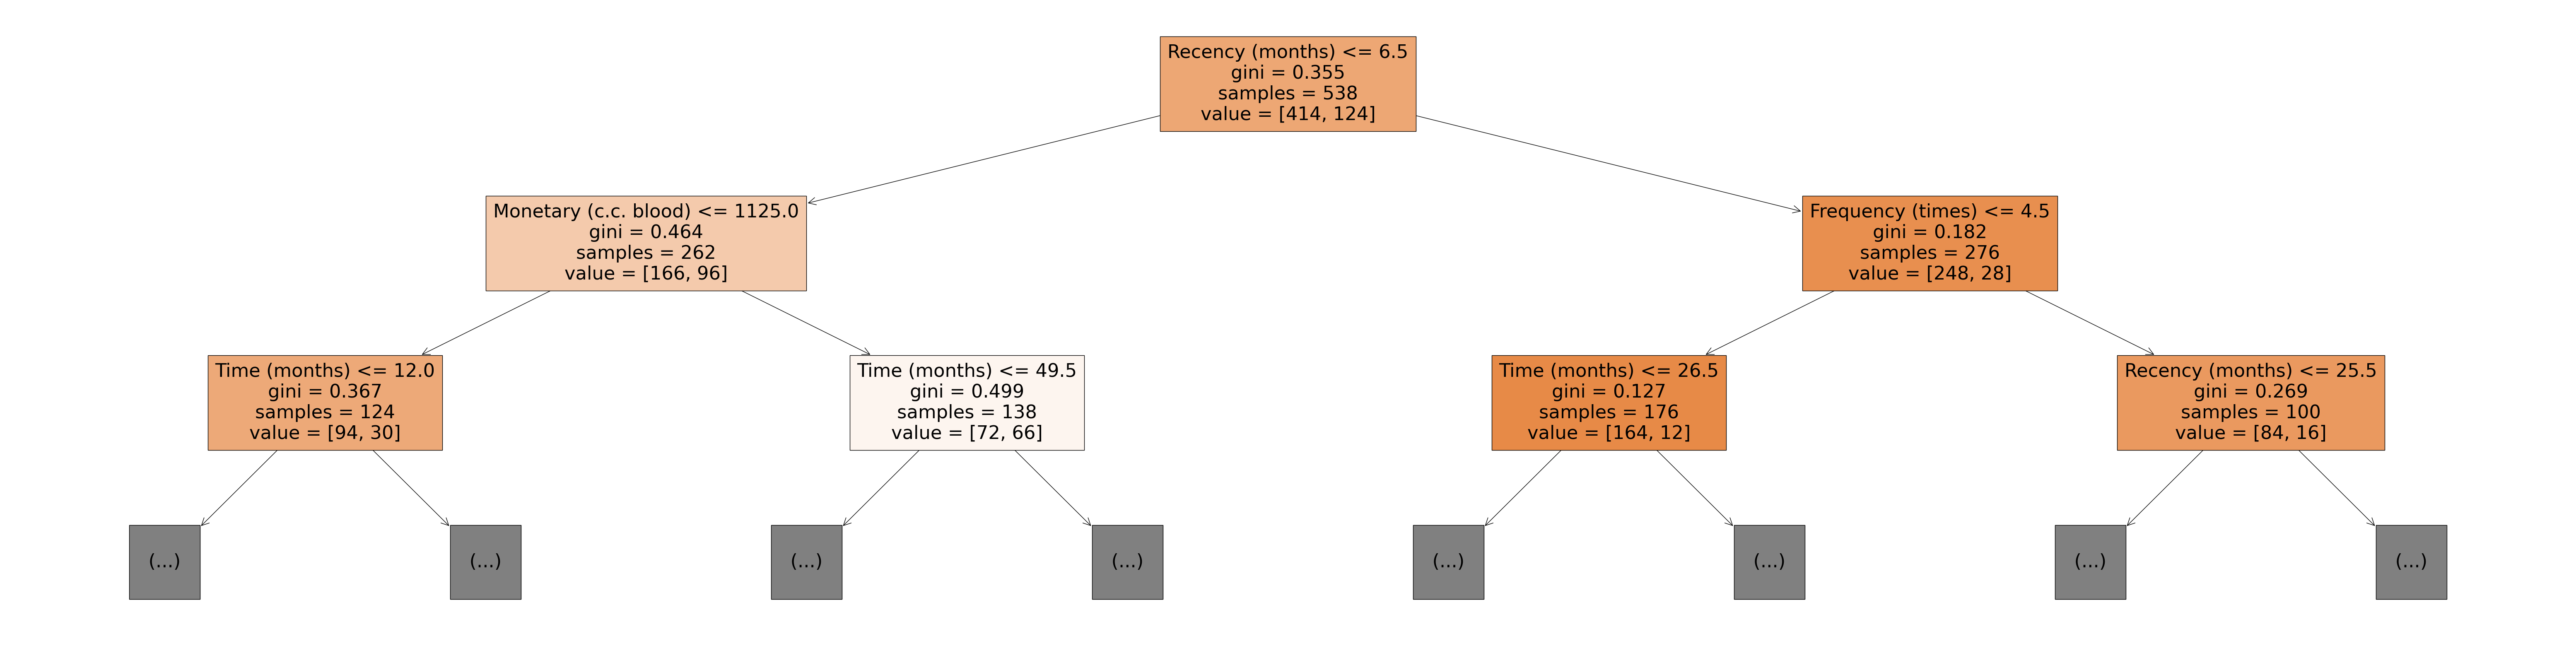

In [7]:
# plotting decision tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))
plot_tree(dt_model, feature_names=x.columns, max_depth=2, filled=True);

In [8]:
dt_model.tree_.max_depth # depth of decision tree

14

In [9]:
# optimizing parameters usung cross validation
grid_param = {'criterion' : ['gini', 'entropy'],'max_depth' : [2,3,4,5,8,10],
              'min_samples_leaf' :[1,2,3], 'max_features' :[1,2,3]}
dt_model_opt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(estimator = dt_model_opt, param_grid = grid_param, cv = 7)
dt_grid.fit(x_train,y_train)
best_dt_grid = dt_grid.best_estimator_
y_pred_train = best_dt_grid.predict(x_train)
y_pred_valid = best_dt_grid.predict(x_valid)
y_pred_test = best_dt_grid.predict(x_test)
print('accuracy_score :', '\n')
print(f'train : {accuracy_score(y_train, y_pred_train)}')
print(f'valid : {accuracy_score(y_valid, y_pred_valid)}')
print(f'test : {accuracy_score(y_test, y_pred_test)}', '\n')
print('precision_score :', '\n')
print(f'train : {precision_score(y_train, y_pred_train)}')
print(f'valid : {precision_score(y_valid, y_pred_valid)}')
print(f'test : {precision_score(y_test, y_pred_test)}', '\n')
print('f1_score :', '\n')
print(f'train : {f1_score(y_train, y_pred_train)}')
print(f'valid : {f1_score(y_valid, y_pred_valid)}')
print(f'test : {f1_score(y_test, y_pred_test)}', '\n')
print('recall_score :', '\n')
print(f'train : {recall_score(y_train, y_pred_train)}')
print(f'valid : {recall_score(y_valid, y_pred_valid)}')
print(f'test : {recall_score(y_test, y_pred_test)}', '\n')

accuracy_score : 

train : 0.8048327137546468
valid : 0.75
test : 0.7866666666666666 

precision_score : 

train : 0.6067415730337079
valid : 0.5833333333333334
test : 0.631578947368421 

f1_score : 

train : 0.5070422535211269
valid : 0.4827586206896552
test : 0.42857142857142855 

recall_score : 

train : 0.43548387096774194
valid : 0.4117647058823529
test : 0.32432432432432434 

